# GENERAL: TO DELETE

Found some crazy resources which will make our life much easier

> 1. [kaggle EEG Muse (meh)](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-mental-state)
> 1. [Crazy code that makes literally 1000 features for you](https://github.com/jordan-bird/eeg-feature-generation)
> 1. [Explanation of features and their importance ans science and shite](https://link.springer.com/chapter/10.1007/978-3-030-29933-0_37)

-Almu

# General

## Fix Random State

In [1]:
SEED = 55;

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import seaborn as sns
import os
#import scipy

# Importing the Raw Data

In [3]:
%%time


# Get Current Working directory and append the data relative dir
cwd = os.getcwd()
notTiredDir = cwd + r"\Data\Raw\NotTired"
tiredDir = cwd + r"\Data\Raw\Tired"

# Hold file locations
filesTired=[];
filesNotTired=[];

#Populate file location arrays
for file in os.listdir(notTiredDir):
    if file.endswith('.csv'):
        filesNotTired.append(os.path.join(notTiredDir, file))
for file in os.listdir(tiredDir):
        if file.endswith('.csv'):
            filesTired.append(os.path.join(tiredDir, file))
            
#Test reading files by changing num1
num1=6;
sample = pd.read_csv(filesNotTired[num1])
sample 

Wall time: 7.98 ms


,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2021-11-01 17:54:38.045,1.110457,-0.382196,0.082630,0.743808,0.455723,-0.523256,0.086015,0.487615,0.493558,...,4.134674,-5.824432,-1.510315,1.0,1.0,2.0,1.0,1.0,70.0,NaN
1,2021-11-01 17:54:39.045,0.904642,-0.382196,0.236881,0.613098,0.313527,-0.523256,0.171247,0.546970,0.538756,...,4.329071,-2.990723,-1.644897,1.0,1.0,2.0,1.0,1.0,70.0,NaN
2,2021-11-01 17:54:39.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/jaw_clench
3,2021-11-01 17:54:40.045,0.652124,-0.382196,0.462323,0.410327,0.293693,-0.523256,0.267178,0.466408,0.343593,...,5.622559,-5.099182,-0.732727,1.0,1.0,2.0,1.0,1.0,70.0,NaN
4,2021-11-01 17:54:41.043,0.558608,-0.382196,0.502156,0.877835,0.281408,-0.523256,0.337400,0.469669,0.381862,...,4.882355,-3.536530,-1.652374,1.0,1.0,2.0,1.0,1.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2021-11-01 17:56:57.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,5.510406,-7.880554,-2.257996,1.0,1.0,4.0,2.0,1.0,70.0,NaN
157,2021-11-01 17:56:57.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
158,2021-11-01 17:56:57.852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
159,2021-11-01 17:56:58.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,4.844971,-6.190796,-2.781372,1.0,1.0,4.0,4.0,1.0,70.0,NaN


In [4]:
#Mini-Summary of Block
print(f"> {len(filesNotTired)} files were added from the NOT TIRED category")
print(f"> {len(filesTired)} files were added from the TIRED category\n")

> 22 files were added from the NOT TIRED category
> 10 files were added from the TIRED category



## Available Features

In [5]:
pd.DataFrame(sample.columns)

,0
0,TimeStamp
1,Delta_TP9
2,Delta_AF7
3,Delta_AF8
4,Delta_TP10
5,Theta_TP9
6,Theta_AF7
7,Theta_AF8
8,Theta_TP10
9,Alpha_TP9


## Raw Data Structure

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        161 non-null    object 
 1   Delta_TP9        141 non-null    float64
 2   Delta_AF7        141 non-null    float64
 3   Delta_AF8        141 non-null    float64
 4   Delta_TP10       141 non-null    float64
 5   Theta_TP9        141 non-null    float64
 6   Theta_AF7        141 non-null    float64
 7   Theta_AF8        141 non-null    float64
 8   Theta_TP10       141 non-null    float64
 9   Alpha_TP9        141 non-null    float64
 10  Alpha_AF7        141 non-null    float64
 11  Alpha_AF8        141 non-null    float64
 12  Alpha_TP10       141 non-null    float64
 13  Beta_TP9         141 non-null    float64
 14  Beta_AF7         141 non-null    float64
 15  Beta_AF8         141 non-null    float64
 16  Beta_TP10        141 non-null    float64
 17  Gamma_TP9       

# Data Preprocessing

## Creating the RAW Dataset

In [7]:
%%time
## Extract rows 21-25 from all files as these are the only 5 relevent features

rowsTired=[];
for f in filesTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])

rowsNotTired=[];
for f in filesNotTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsNotTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])



Wall time: 3min 3s


In [8]:
data_NT = pd.DataFrame(rowsNotTired);
original_NT = data_NT.copy();
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
1666,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179
1667,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883
1668,2021-11-02 22:14:36.024,776.849817,800.219780,793.369963,803.040293,482.307692
1669,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883


In [9]:
data_T = pd.DataFrame(rowsTired);
original_T = data_T.copy();
data_T

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-11 00:54:16.918,782.893773,767.985348,1100.805861,799.413919,732.930403
1,2021-11-11 00:54:17.318,NaN,NaN,NaN,NaN,NaN
2,2021-11-11 00:54:17.920,790.549451,887.655678,1648.791209,809.487179,734.139194
3,2021-11-11 00:54:18.686,NaN,NaN,NaN,NaN,NaN
4,2021-11-11 00:54:18.929,755.494505,0.000000,0.000000,732.124542,565.714286
...,...,...,...,...,...,...
452,2021-11-12 06:29:34.149,NaN,NaN,NaN,NaN,NaN
453,2021-11-12 06:29:34.364,845.347985,590.293040,1199.523810,852.197802,680.146520
454,2021-11-12 06:29:35.364,811.501832,514.542125,695.457875,851.794872,835.677656
455,2021-11-12 06:29:35.788,NaN,NaN,NaN,NaN,NaN


In [10]:
print(f"Not Tired Data size is: \t{data_NT.shape}", f"\nTired Data size is: \t\t{data_T.shape}")

Not Tired Data size is: 	(9685, 6) 
Tired Data size is: 		(10796, 6)


## Adding empty column 
Append an empty column in order to run the method.


In [11]:
#Conserve headers
headers = original_NT.columns.values.tolist()

##### #Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
##### data_T = pd.DataFrame(np.hstack((data_T.to_numpy(),   np.zeros((data_T.shape[0], 1)) )))
##### data_NT= pd.DataFrame(np.hstack((data_NT.to_numpy(), np.zeros((data_NT.shape[0], 1)))))

In [12]:
#Reattach headers
# data_T.columns =  np.hstack((headers, ['Empty']));
# data_NT.columns = np.hstack((headers, ['Empty']));

data_T.columns =  np.hstack((headers));
data_NT.columns = np.hstack((headers));

#Check
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
1666,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179
1667,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883
1668,2021-11-02 22:14:36.024,776.849817,800.219780,793.369963,803.040293,482.307692
1669,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883


## Remove Empty Rows

In [13]:
data_T = data_T.dropna()

In [14]:
data_NT = data_NT.dropna()

## Convert Datetime Column to Timestamps

In [15]:
from datetime import datetime

ind = 0;
for time in data_T.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_T.iat[ind, 0] = (tmstmp);
    ind=ind+1;
    
ind = 0;
for time in data_NT.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_NT.iat[ind, 0] = (tmstmp);
    ind=ind+1;



In [16]:
data_NT.head()

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,1635812847.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,1635812848.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,1635812849.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,1635812850.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,1635812851.366,809.890110,780.476190,798.205128,743.406593,785.311355


## Save RAW Data to File

In [17]:
savelocT = cwd + r"\Data\Preprocessed\Tired.csv"
savelocNT = cwd + r"\Data\Preprocessed\NotTired.csv"

if os.path.exists(savelocT):
    os.remove(savelocT)
    
if os.path.exists(savelocNT):
    os.remove(savelocNT)

data_T.to_csv(savelocT,  mode='w', index = False)
data_NT.to_csv(savelocNT,mode='w', index = False)


## EEG Feature Generation

In [18]:
from eegFG import EEG_feature_extraction as FG

Nsamp = 50;
Perio = 6;

xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.05,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xT.shape

(119, 810)

In [19]:
Nsamp = 50;
Perio = 5;

xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.06,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xNT.shape

(219, 810)

```python

%%time

from importlib import reload

flaggity=False

tmp_results=[]
thresh = 95;
for ns in range(50,256,1):
    if (flaggity==True):
        break;
    for p in range(3,8):
        
        try:
            reload(FG);
            xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
            
            xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
        
        except (UnboundLocalError):
            continue;
            
        
        if (xNT.shape[1] == xT.shape[1]):
            print('Cols match!', xT.shape, xNT.shape)
            if (xNT.shape[0] >= thresh and xT.shape[0] >= thresh):
                print('Thresh met.')
                tmp_results.append((ns,p,xNT.shape[0],xT.shape[0],xNT.shape[1]))
                flaggity=True;
                break;
                
                
tmp_results

```

In [20]:
X_NT = pd.DataFrame(xNT)
X_NT.columns = np.hstack((['TimeStamp'], yNT))
X_NT.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_156_4,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,779.105307,790.250350,793.258774,774.799042,826.072764,0.795194,-0.121172,0.069205,-2.103254,-0.647116,...,1.883061e-16,1.745045e-16,1.544986e-16,1.448308e-16,1.547404e-16,1.846458e-16,1.476364e-16,1.515523e-16,1.510991e-16,1.629086e-16
std,13.221727,13.962959,10.783482,15.090785,48.215973,29.464956,27.057741,19.906972,39.864481,103.172259,...,1.326495e-16,1.444510e-16,1.269430e-16,1.087036e-16,1.012431e-16,1.309267e-16,1.119076e-16,1.210018e-16,1.094171e-16,1.336611e-16
min,742.197802,753.641026,778.260073,731.721612,730.996337,-88.384188,-79.917043,-84.016933,-130.084391,-210.246429,...,1.682008e-17,6.015924e-18,1.900429e-17,7.931615e-18,2.128355e-17,1.518165e-17,1.188983e-17,1.419177e-17,0.000000e+00,0.000000e+00
25%,773.142857,786.197802,785.391941,770.543956,795.304029,-20.452674,-10.171238,-8.063057,-17.210459,-56.006977,...,9.230115e-17,7.334713e-17,7.405775e-17,7.082150e-17,7.602051e-17,9.593048e-17,6.260944e-17,6.938637e-17,7.105427e-17,7.944109e-17
50%,780.717949,793.531136,791.194139,776.608059,825.362637,0.764957,3.152271,1.392108,0.776751,-7.501446,...,1.491212e-16,1.309328e-16,1.194447e-16,1.221453e-16,1.237816e-16,1.576475e-16,1.158174e-16,1.165273e-16,1.280949e-16,1.137423e-16
75%,790.065934,797.560440,797.399267,784.102564,849.296703,18.143992,11.409339,11.061487,15.138016,66.080933,...,2.449648e-16,2.106828e-16,1.944893e-16,1.750761e-16,2.196927e-16,2.355246e-16,2.025191e-16,1.702570e-16,2.139017e-16,1.913195e-16
max,797.479853,813.838828,826.329670,816.578755,970.981685,81.924841,93.667981,65.789165,145.152860,389.591801,...,6.238957e-16,6.452308e-16,7.038281e-16,6.440853e-16,4.659868e-16,9.722256e-16,4.971045e-16,6.153708e-16,5.329071e-16,6.787450e-16


In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(pd.DataFrame(pd.DataFrame(X_NT).head()))

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q1_3,lag1_mean_q1_4,lag1_mean_q2_0,lag1_mean_q2_1,lag1_mean_q2_2,lag1_mean_q2_3,lag1_mean_q2_4,lag1_mean_q3_0,lag1_mean_q3_1,lag1_mean_q3_2,lag1_mean_q3_3,lag1_mean_q3_4,lag1_mean_q4_0,lag1_mean_q4_1,lag1_mean_q4_2,lag1_mean_q4_3,lag1_mean_q4_4,lag1_mean_d_q1q2_0,lag1_mean_d_q1q2_1,lag1_mean_d_q1q2_2,lag1_mean_d_q1q2_3,lag1_mean_d_q1q2_4,lag1_mean_d_q1q3_0,lag1_mean_d_q1q3_1,lag1_mean_d_q1q3_2,lag1_mean_d_q1q3_3,lag1_mean_d_q1q3_4,lag1_mean_d_q1q4_0,lag1_mean_d_q1q4_1,lag1_mean_d_q1q4_2,lag1_mean_d_q1q4_3,lag1_mean_d_q1q4_4,lag1_mean_d_q2q3_0,lag1_mean_d_q2q3_1,lag1_mean_d_q2q3_2,lag1_mean_d_q2q3_3,lag1_mean_d_q2q3_4,lag1_mean_d_q2q4_0,lag1_mean_d_q2q4_1,lag1_mean_d_q2q4_2,lag1_mean_d_q2q4_3,lag1_mean_d_q2q4_4,lag1_mean_d_q3q4_0,lag1_mean_d_q3q4_1,lag1_mean_d_q3q4_2,lag1_mean_d_q3q4_3,lag1_mean_d_q3q4_4,lag1_std_0,lag1_std_1,lag1_std_2,lag1_std_3,lag1_std_4,lag1_std_d_h2h1_0,lag1_std_d_h2h1_1,lag1_std_d_h2h1_2,lag1_std_d_h2h1_3,lag1_std_d_h2h1_4,lag1_skew_0,lag1_skew_1,lag1_skew_2,lag1_skew_3,lag1_skew_4,lag1_kurt_0,lag1_kurt_1,lag1_kurt_2,lag1_kurt_3,lag1_kurt_4,lag1_max_0,lag1_max_1,lag1_max_2,lag1_max_3,lag1_max_4,lag1_max_d_h2h1_0,lag1_max_d_h2h1_1,lag1_max_d_h2h1_2,lag1_max_d_h2h1_3,lag1_max_d_h2h1_4,lag1_max_q1_0,lag1_max_q1_1,lag1_max_q1_2,lag1_max_q1_3,lag1_max_q1_4,lag1_max_q2_0,lag1_max_q2_1,lag1_max_q2_2,lag1_max_q2_3,lag1_max_q2_4,lag1_max_q3_0,lag1_max_q3_1,lag1_max_q3_2,lag1_max_q3_3,lag1_max_q3_4,lag1_max_q4_0,lag1_max_q4_1,lag1_max_q4_2,lag1_max_q4_3,lag1_max_q4_4,lag1_max_d_q1q2_0,lag1_max_d_q1q2_1,lag1_max_d_q1q2_2,lag1_max_d_q1q2_3,lag1_max_d_q1q2_4,lag1_max_d_q1q3_0,lag1_max_d_q1q3_1,lag1_max_d_q1q3_2,lag1_max_d_q1q3_3,lag1_max_d_q1q3_4,lag1_max_d_q1q4_0,lag1_max_d_q1q4_1,lag1_max_d_q1q4_2,lag1_max_d_q1q4_3,lag1_max_d_q1q4_4,lag1_max_d_q2q3_0,lag1_max_d_q2q3_1,lag1_max_d_q2q3_2,lag1_max_d_q2q3_3,lag1_max_d_q2q3_4,lag1_max_d_q2q4_0,lag1_max_d_q2q4_1,lag1_max_d_q2q4_2,lag1_max_d_q2q4_3,lag1_max_d_q2q4_4,lag1_max_d_q3q4_0,lag1_max_d_q3q4_1,lag1_max_d_q3q4_2,lag1_max_d_q3q4_3,lag1_max_d_q3q4_4,lag1_min_0,lag1_min_1,lag1_min_2,lag1_min_3,lag1_min_4,lag1_min_d_h2h1_0,lag1_min_d_h2h1_1,lag1_min_d_h2h1_2,lag1_min_d_h2h1_3,lag1_min_d_h2h1_4,lag1_min_q1_0,lag1_min_q1_1,lag1_min_q1_2,lag1_min_q1_3,lag1_min_q1_4,lag1_min_q2_0,lag1_min_q2_1,lag1_min_q2_2,lag1_min_q2_3,lag1_min_q2_4,lag1_min_q3_0,lag1_min_q3_1,lag1_min_q3_2,lag1_min_q3_3,lag1_min_q3_4,lag1_min_q4_0,lag1_min_q4_1,lag1_min_q4_2,lag1_min_q4_3,lag1_min_q4_4,lag1_min_d_q1q2_0,lag1_min_d_q1q2_1,lag1_min_d_q1q2_2,lag1_min_d_q1q2_3,lag1_min_d_q1q2_4,lag1_min_d_q1q3_0,lag1_min_d_q1q3_1,lag1_min_d_q1q3_2,lag1_min_d_q1q3_3,lag1_min_d_q1q3_4,lag1_min_d_q1q4_0,lag1_min_d_q1q4_1,lag1_min_d_q1q4_2,lag1_min_d_q1q4_3,lag1_min_d_q1q4_4,lag1_min_d_q2q3_0,lag1_min_d_q2q3_1,lag1_min_d_q2q3_2,lag1_min_d_q2q3_3,lag1_min_d_q2q3_4,lag1_min_d_q2q4_0,lag1_min_d_q2q4_1,lag1_min_d_q2q4_2,lag1_min_d_q2q4_3,lag1_min_d_q2q4_4,lag1_min_d_q3q4_0,lag1_min_d_q3q4_1,lag1_min_d_q3q4_2,lag1_min_d_q3q4_3,lag1_min_d_q3q4_4,lag1_covM_0_0,lag1_covM_0_1,lag1_covM_0_2,lag1_covM_0_3,lag1_covM_0_4,lag1_covM_1_1,lag1_covM_1_2,lag1_covM_1_3,lag1_covM_1_4,lag1_covM_2_2,lag1_covM_2_3,lag1_covM_2_4,lag1_covM_3_3,lag1_covM_3_4,lag1_covM_4_4,lag1_eigenval_0,lag1_eigenval_1,lag1_eigenval_2,lag1_eigenval_3,lag1_eigenval_4,lag1_logcovM_0_0,lag1_logcovM_0_1,lag1_logcovM_0_2,lag1_logcovM_0_3,lag1_logcovM_0_4,lag1_logcovM_1_1,lag1_logcovM_1_2,lag1_logcovM_1_3,lag1_logcovM_1_4,lag1_logcovM_2_2,lag1_logcovM_2_3,lag1_logcovM_2_4,lag1_logcovM_3_3,lag1_logcovM_3_4,lag1_logcovM_4_4,lag1_topFreq_1_0,lag1_topFreq_2_0,lag1_topFreq_3_0,lag1_topFreq_4_0,lag1_topFreq_5_0,lag1_topFreq_6_0,lag1_topFreq_7_0,lag1_topFreq_8_0,lag1_topFreq_9_0,lag1_topFreq_10_0,lag1_topFreq_1_1,lag1_topFreq_2_1,lag1_topFreq_3_1,la

In [22]:
X_T = pd.DataFrame(xT)
X_T.columns = np.hstack((['TimeStamp'], yT))
X_T.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_156_4,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,853.022850,742.893619,911.472025,844.334452,784.668021,1.439227,-0.123772,-0.581400,4.849069,7.663767,...,4.706894e-17,3.404702e-17,3.489199e-17,3.983879e-17,4.338665e-17,4.854704e-17,4.007357e-17,4.649238e-17,4.644427e-17,4.273157e-17
std,118.126749,251.525994,217.512393,104.498981,33.160809,254.559496,381.727887,256.604333,246.614039,87.697119,...,3.940232e-17,2.291741e-17,2.453074e-17,3.198417e-17,2.243436e-17,2.956604e-17,2.879612e-17,4.108687e-17,3.984125e-17,2.391119e-17
min,732.796093,350.818071,532.069597,664.499389,705.665446,-628.239954,-655.880639,-731.972815,-460.710955,-218.204290,...,4.615758e-18,2.759144e-18,2.022967e-18,2.964421e-20,1.887122e-18,6.518450e-18,4.611536e-18,8.939066e-18,2.359224e-18,0.000000e+00
25%,765.869963,558.797314,777.084860,784.841270,770.570818,-34.380751,-320.332371,-73.953916,-43.008357,-37.787215,...,1.936982e-17,1.839066e-17,1.849984e-17,1.699074e-17,2.899532e-17,2.796610e-17,1.803535e-17,2.468225e-17,2.512148e-17,2.047150e-17
50%,805.189255,626.153846,882.954823,803.308913,794.645910,-0.355619,88.870928,7.618361,-12.709321,8.080558,...,3.816092e-17,2.602471e-17,2.690037e-17,2.963807e-17,3.860086e-17,3.544832e-17,3.376057e-17,3.576977e-17,4.189529e-17,4.213000e-17
75%,934.731380,967.301587,950.042735,876.507937,810.024420,30.105383,252.124660,124.322869,29.953412,45.431320,...,5.551883e-17,4.130061e-17,4.432209e-17,5.452344e-17,6.176773e-17,7.378400e-17,6.070668e-17,5.785969e-17,5.617334e-17,6.525182e-17
max,1152.985348,1349.884005,1541.947497,1150.097680,823.656899,717.580021,901.701208,607.799946,898.762093,231.658823,...,1.747216e-16,8.929123e-17,1.135637e-16,1.274392e-16,9.698879e-17,1.268587e-16,1.192844e-16,2.085431e-16,2.197232e-16,8.815618e-17


In [23]:
# Drop TimeStamp

X_T=X_T.iloc[:,1:];
X_NT=X_NT.iloc[:,1:];

In [24]:
#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
X_T = pd.DataFrame(np.hstack((X_T.to_numpy(),   np.ones((X_T.shape[0], 1)) )))
X_NT= pd.DataFrame(np.hstack((X_NT.to_numpy(), np.zeros((X_NT.shape[0], 1)))))

In [25]:
X_T.columns  = np.hstack((yT, ['Target']))
X_NT.columns = np.hstack((yNT, ['Target']))

In [26]:
print(X_T.shape[0], X_NT.shape[0])

if (X_T.shape[1] == X_NT.shape[1]):
    dataset = np.vstack((X_T, X_NT))
    dataset = pd.DataFrame(dataset)
    print('\n')
else:
    print('ATTENTION')


119 219




## Randomize the Dataset

In [27]:
dataset.columns = np.hstack((yT, ['Target']))
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,...,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4,Target
0,802.234432,784.666667,774.593407,787.890110,27.674516,5.581285,2.863975,18.267024,-18.612984,785.200831,...,6.452308e-16,3.152189e-16,6.440853e-16,3.482708e-16,8.202506e-17,4.014308e-16,3.966420e-16,5.329071e-16,4.322063e-16,0.0
1,1015.720391,950.042735,848.235653,788.601954,-14.972331,-396.019945,-28.770954,-21.329183,44.131002,819.690302,...,1.762501e-17,4.033423e-17,3.350057e-17,7.444235e-17,2.671987e-17,1.366488e-17,4.571964e-17,4.463041e-17,2.047150e-17,1.0
2,790.630037,785.633700,790.307692,831.970696,0.384797,2.650787,7.739931,0.231068,-1.728920,781.144802,...,5.419411e-17,8.533141e-17,1.423934e-16,7.703826e-17,1.767710e-16,6.199033e-17,2.927978e-16,2.450149e-16,1.004859e-16,0.0
3,554.768010,907.869353,799.145299,815.732601,33.958958,590.617749,124.322869,45.518191,23.631301,760.536194,...,2.919053e-17,1.403297e-17,4.953048e-17,5.674335e-17,2.095111e-17,9.627585e-17,3.576977e-17,2.359224e-18,3.580362e-17,1.0
4,408.907204,637.234432,1145.329670,765.836386,-169.656420,254.302471,106.306123,-302.679311,-63.199528,1350.363173,...,2.685814e-17,2.184802e-17,2.062161e-17,4.928406e-17,2.448588e-17,3.376057e-17,3.966008e-17,2.512148e-17,1.986027e-17,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,799.978022,782.087912,768.146520,782.168498,-0.365681,-3.604666,9.716559,28.893683,-21.051229,752.669107,...,6.452308e-16,3.152189e-16,6.440853e-16,3.482708e-16,8.202506e-17,4.014308e-16,3.966420e-16,5.329071e-16,4.322063e-16,0.0
334,758.959707,808.358974,774.109890,804.410256,36.716714,93.667981,-33.277699,-10.970746,-7.501446,744.051198,...,6.193421e-17,1.187045e-16,8.430122e-17,1.104327e-16,1.115025e-16,1.994325e-16,1.586569e-16,7.944109e-17,1.509903e-16,0.0
335,1349.884005,1541.947497,664.499389,794.645910,-628.239954,-457.041176,-178.053609,-402.405978,-104.573378,904.659251,...,1.421260e-17,7.775169e-18,1.483934e-17,2.099537e-17,3.464997e-17,2.913432e-17,1.794799e-17,2.703570e-17,1.986027e-17,1.0
336,772.739927,826.329670,763.472527,730.996337,-88.384188,-54.777377,65.789165,-52.312680,-210.246429,858.740170,...,8.236001e-17,2.596011e-17,3.204291e-17,2.498363e-17,4.081299e-17,5.845470e-17,2.154702e-17,1.776357e-17,7.324107e-17,0.0


## Separating Input and Output

In [28]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Y labeled for plotting or result check
def label(n):
    if (n==0):
        return 'Not Tired'
    return 'Tired'

y_labeled = list(map(label, y));

## Splitting Dataset into the Training and Test Sets

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

## Feature Scaling


In [30]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler();
scX.fit(X_train); #Fit to training data only
x = scX.transform(x)

In [31]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,799,800,801,802,803,804,805,806,807,808
0,0.186614,-0.373397,-0.336479,-0.514259,0.135403,0.019922,0.015852,0.127850,-0.158070,-0.174052,...,1.104916,4.048942,1.887419,5.130355,2.379939,-0.436272,2.903600,2.590790,4.073076,2.653220
1,1.581781,0.760302,0.711333,-0.499056,-0.134767,-1.703652,-0.175147,-0.130592,0.504281,0.060361,...,-0.846866,-0.773237,-0.608397,-0.715208,-0.437967,-0.916131,-0.928087,-0.615703,-0.640912,-0.794173
2,0.110777,-0.366768,-0.112889,0.427184,-0.037479,0.007345,0.045292,0.010130,0.020165,-0.201619,...,0.394724,-0.492260,-0.199845,0.327300,-0.411253,0.385799,-0.450561,1.641931,1.293668,-0.124224
3,-1.430622,0.471191,0.012855,0.080382,0.175215,2.530755,0.749176,0.305716,0.287878,-0.341688,...,-0.973266,-0.684374,-0.847200,-0.561742,-0.620103,-0.966184,-0.111771,-0.706618,-1.049013,-0.665799
4,-2.383847,-1.384086,4.938504,-0.985268,-1.114698,1.087372,0.640398,-1.966942,-0.628745,3.667153,...,-1.025799,-0.702295,-0.776243,-0.838508,-0.696865,-0.935515,-0.729512,-0.671071,-0.829258,-0.799290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.171868,-0.391075,-0.428207,-0.636458,-0.042233,-0.019502,0.057226,0.197209,-0.183810,-0.395158,...,1.104916,4.048942,1.887419,5.130355,2.379939,-0.436272,2.903600,2.590790,4.073076,2.653220
334,-0.096194,-0.210980,-0.343358,-0.161433,0.192686,0.397968,-0.202358,-0.062983,-0.040772,-0.453731,...,0.108846,-0.432790,0.103165,-0.228857,-0.067598,-0.180509,0.907565,0.416242,-0.304838,0.298642
335,3.765598,4.817973,-1.902940,-0.369973,-4.019848,-1.965540,-1.076461,-2.617850,-1.065505,0.637864,...,-0.748496,-0.799456,-0.904017,-0.893865,-0.987978,-0.847325,-0.775226,-0.869461,-0.810778,-0.799290
336,-0.006138,-0.087786,-0.494711,-1.729358,-0.599835,-0.239123,0.395771,-0.332819,-2.181034,0.325769,...,-0.598491,-0.275849,-0.738907,-0.729163,-0.946935,-0.793851,-0.485499,-0.836576,-0.900294,-0.352341


# Principal Component Analysis
## Calculate Principal Components

In [32]:
from sklearn.decomposition import PCA

information = 225; #99.9/100;
PrinCom=PCA(n_components=information, random_state = SEED)
PrinCom.fit(X_train)

Z_train = PrinCom.transform(X_train);
Z_test = PrinCom.transform(X_test);

print('Train set shape = ',Z_train.shape, '\nTest set shape  = ',Z_test.shape)


Z=PrinCom.transform(x)
pd.DataFrame(Z).describe() #Data No longer Standard
print(f"Using the first {Z.shape[1]} Principal Components describes {np.round(PrinCom.explained_variance_ratio_.sum() * 100,5)}% of the data.")
pd.DataFrame(Z)

Train set shape =  (270, 225) 
Test set shape  =  (68, 225)
Using the first 225 Principal Components describes 100.0% of the data.


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-181331.407323,-20200.600837,11735.529517,16895.069951,-6261.836169,-22760.151554,-1153.417864,5221.329464,1714.995697,-2498.451478,...,36.053006,21.703076,10.332382,-106.633509,84.702267,-55.420249,53.334187,-91.421835,-90.305229,-1.519591
1,-181329.498341,-20199.639997,11735.164700,16893.261201,-6261.386542,-22759.818707,-1153.439217,5220.417334,1714.846343,-2499.364772,...,36.128889,21.811621,10.340549,-105.306704,83.815287,-54.903313,53.100118,-91.634076,-90.403151,-2.781040
2,-181331.370764,-20200.612890,11735.536862,16895.147156,-6261.839963,-22759.625246,-1153.555512,5221.166803,1714.894421,-2498.372774,...,35.879850,21.205755,9.917388,-106.899480,85.206520,-55.570437,52.711264,-91.493149,-90.995266,-2.036794
3,-181329.513520,-20199.122881,11735.170129,16894.347289,-6261.267322,-22759.838466,-1153.810576,5220.589843,1715.091778,-2498.583105,...,36.594425,22.514696,10.294974,-106.148056,84.043647,-55.711934,53.017473,-91.647176,-90.049823,-2.407389
4,-181327.753033,-20203.685912,11736.167621,16894.573744,-6260.827918,-22761.462944,-1148.837134,5216.986799,1714.935050,-2498.737369,...,36.442806,21.751667,9.793105,-106.121644,84.525374,-55.232843,51.921384,-91.730588,-90.216209,-2.164841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-181331.410655,-20200.598365,11735.521541,16895.065341,-6261.835692,-22760.163894,-1153.404638,5221.355289,1714.985294,-2498.430166,...,35.708154,21.793376,10.407274,-106.962807,84.938155,-55.268495,52.890645,-91.261898,-90.248189,-1.777997
334,-181331.266317,-20200.655571,11735.487265,16895.187169,-6261.865556,-22759.431607,-1153.352223,5220.820464,1714.775043,-2498.031233,...,35.732515,21.230187,10.615772,-106.238950,84.350461,-55.786849,52.833722,-91.741937,-90.375988,-2.330849
335,-181324.982252,-20202.083432,11742.095285,16893.942525,-6256.127924,-22757.176344,-1157.111277,5225.166513,1714.988136,-2498.947203,...,36.829986,21.553128,11.109918,-104.305795,83.715667,-54.420049,50.719990,-90.678613,-90.158387,-1.921494
336,-181330.628826,-20200.759941,11735.930400,16895.824452,-6261.983071,-22752.917756,-1157.288634,5221.107631,1714.159808,-2497.994072,...,36.419421,21.745094,10.367810,-106.333075,83.669593,-55.288845,52.573691,-91.780646,-91.591205,-2.333607


## Scaling the Principal Components

In [33]:
scZ = StandardScaler();
Z = scZ.fit_transform(Z)
pd.DataFrame(Z).describe()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
count,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,...,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02
mean,2.378551e-11,-2.644052e-12,3.062874e-12,3.934237e-12,7.786660e-13,1.193453e-11,2.809649e-13,-1.254802e-12,1.977865e-12,-1.156662e-12,...,6.142358e-15,4.589360e-15,-1.082500e-14,-2.376758e-13,1.391849e-13,-1.785682e-13,6.807498e-14,-8.097073e-15,-1.225998e-13,3.147876e-15
std,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,...,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00
min,-4.362123e-01,-4.938838e+00,-2.316665e+00,-2.555790e+00,-2.467922e+00,-3.267940e+00,-3.511757e+00,-6.112778e+00,-6.928926e+00,-6.310606e+00,...,-3.480842e+00,-3.109313e+00,-2.876568e+00,-2.807358e+00,-2.770532e+00,-3.065876e+00,-3.734852e+00,-3.295849e+00,-2.032578e+00,-2.947581e+00
25%,-4.211607e-01,5.870475e-02,-2.690050e-01,-1.738041e-01,-2.656209e-01,-2.382447e-01,7.832422e-02,-4.353864e-02,-5.967189e-02,3.546496e-03,...,-6.627191e-01,-6.052500e-01,-5.828076e-01,-5.693369e-01,-7.363044e-01,-5.484366e-01,-3.777132e-01,-7.293164e-01,-6.745998e-01,-6.528010e-01
50%,-3.925694e-01,7.608398e-02,-2.355127e-01,7.204845e-02,-2.284930e-01,-1.245680e-01,2.293789e-01,2.396650e-01,1.264171e-01,9.369290e-02,...,-8.803221e-02,-1.929226e-01,-1.316656e-02,-1.459389e-01,1.057518e-01,2.820701e-02,1.043944e-01,7.803352e-02,-7.590733e-02,-5.257461e-02
75%,-9.512927e-02,1.923888e-01,-1.849928e-01,1.789398e-01,6.509622e-02,1.084783e-01,2.966866e-01,4.078968e-01,2.027806e-01,2.823760e-01,...,6.029013e-01,5.176399e-01,6.062405e-01,3.396354e-01,6.964623e-01,5.800593e-01,5.589803e-01,6.555127e-01,5.952949e-01,6.890575e-01
max,4.664234e+00,3.086676e+00,6.947140e+00,4.633108e+00,6.394114e+00,4.107960e+00,4.313482e+00,3.554447e+00,6.431950e+00,3.400625e+00,...,2.662253e+00,3.514843e+00,4.803187e+00,4.126811e+00,2.105634e+00,3.111648e+00,2.660216e+00,3.044191e+00,4.807246e+00,2.780713e+00


# Image Creation

## Rescaling

In [34]:
## Scale all the PCA components on 0-256
# (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)


def gen_images(data):
    images=[];
    for r in range(0,data.shape[0]): #Cycle over rows
        pixels=[];
        mini=min(data[r,:])
        maxi=max(data[r,:])
        m = (maxi-mini)/(256);

        for c in range(0,225): #Cycle over cols
            #pixels.append(m * data[r,c] - mini);
            I = data[r,c]
            pixels.append((((I - mini) / (maxi - mini)) * 255.9).astype(np.uint8)) #Fixed Scaling, save as int

        #once cols are done running
        img = np.reshape(pixels, (15,15)); #reshape into a square image
        images.append(img)
        
    return images;
    
all_images      = gen_images(Z)
x_train_img = gen_images(Z_train)
x_test_img  = gen_images(Z_test)

#Reshape into input shape for CNN models
x_train_img = np.array(x_train_img).reshape(270,15,15,1)
x_test_img  = np.array(x_test_img).reshape(68,15,15,1)
all_images  = np.array(all_images).reshape(338,15,15,1)

## Saving Images

In [86]:
import imageio

# Relative paths to saved folders
TiredImgFolder = cwd + r"\Data\GeneratedImages\Tired"
NotTiredImgFolder = cwd + r"\Data\GeneratedImages\Not Tired"

# Clear the folders
import glob

files = glob.glob(TiredImgFolder + r"\*")
for f in files:
    os.remove(f)

files = glob.glob(NotTiredImgFolder + r"\*")
for f in files:
    os.remove(f)   


ctr1=0;
ctr2=0;
for img in all_images.reshape(338,15,15):
    
    if (y[ctr1+ctr2] == 0): #Not Tired
        fstr = NotTiredImgFolder + r"\img_" + str(ctr1) + r".png"
        imageio.imwrite(fstr, img[:, :], dpi=(300,300))
        ctr1+=1; #Counter
    else:
        fstr = TiredImgFolder + r"\img_" + str(ctr2) + r".png"
        imageio.imwrite(fstr, img[:, :], dpi=(300,300))
        ctr2+=1;

    
    

## Image Feature Generation

### Datagen Definitions

In [36]:
from keras.preprocessing.image import ImageDataGenerator

#rpath to IMageFolder
genimgsPath = cwd + r"\Data\GeneratedImages"

r  = 1
sr = 0.2
zr = 0.2
hf = False
ValidationSplit = 0.2

imageGenerator = ImageDataGenerator(rescale = r,
                                   shear_range = sr,
                                   zoom_range = zr,
                                   horizontal_flip = hf,
                                   validation_split=ValidationSplit)

### Generating Features

In [37]:
imgs_train = imageGenerator.flow_from_directory(genimgsPath,
                                                target_size = (15, 15),
                                                batch_size = 32,
                                                subset="training",
                                                class_mode='categorical',
                                                shuffle=True,
                                                color_mode="grayscale")

imgs_test = imageGenerator.flow_from_directory(genimgsPath,
                                               target_size = (15, 15),
                                               batch_size = 32,
                                               subset="validation",
                                               class_mode='categorical',
                                               shuffle=True,
                                               color_mode="grayscale")
print(imgs_test.class_indices)

Found 272 images belonging to 2 classes.
Found 66 images belonging to 2 classes.
{'Not Tired': 0, 'Tired': 1}


## Image Examples

This image is for the: "Not Tired" class.


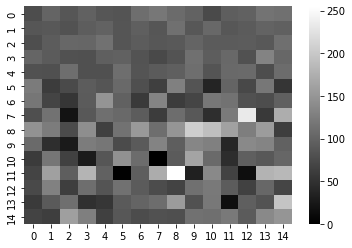

In [38]:
#first row of data
sns.heatmap(all_images.reshape(338,15,15)[0], cmap='gray');
print(f'This image is for the: \"{y_labeled[0]}\" class.')

This image is for the: "Tired" class.


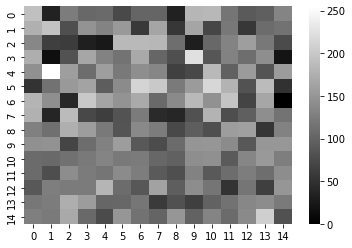

In [39]:
#nth row of data
n=113
sns.heatmap(all_images.reshape(338,15,15)[n], cmap='gray');
print(f'This image is for the: \"{y_labeled[n]}\" class.')

# Data Exploration

## General Correlation Matrix for Principal Components

<Figure size 1800x1200 with 0 Axes>

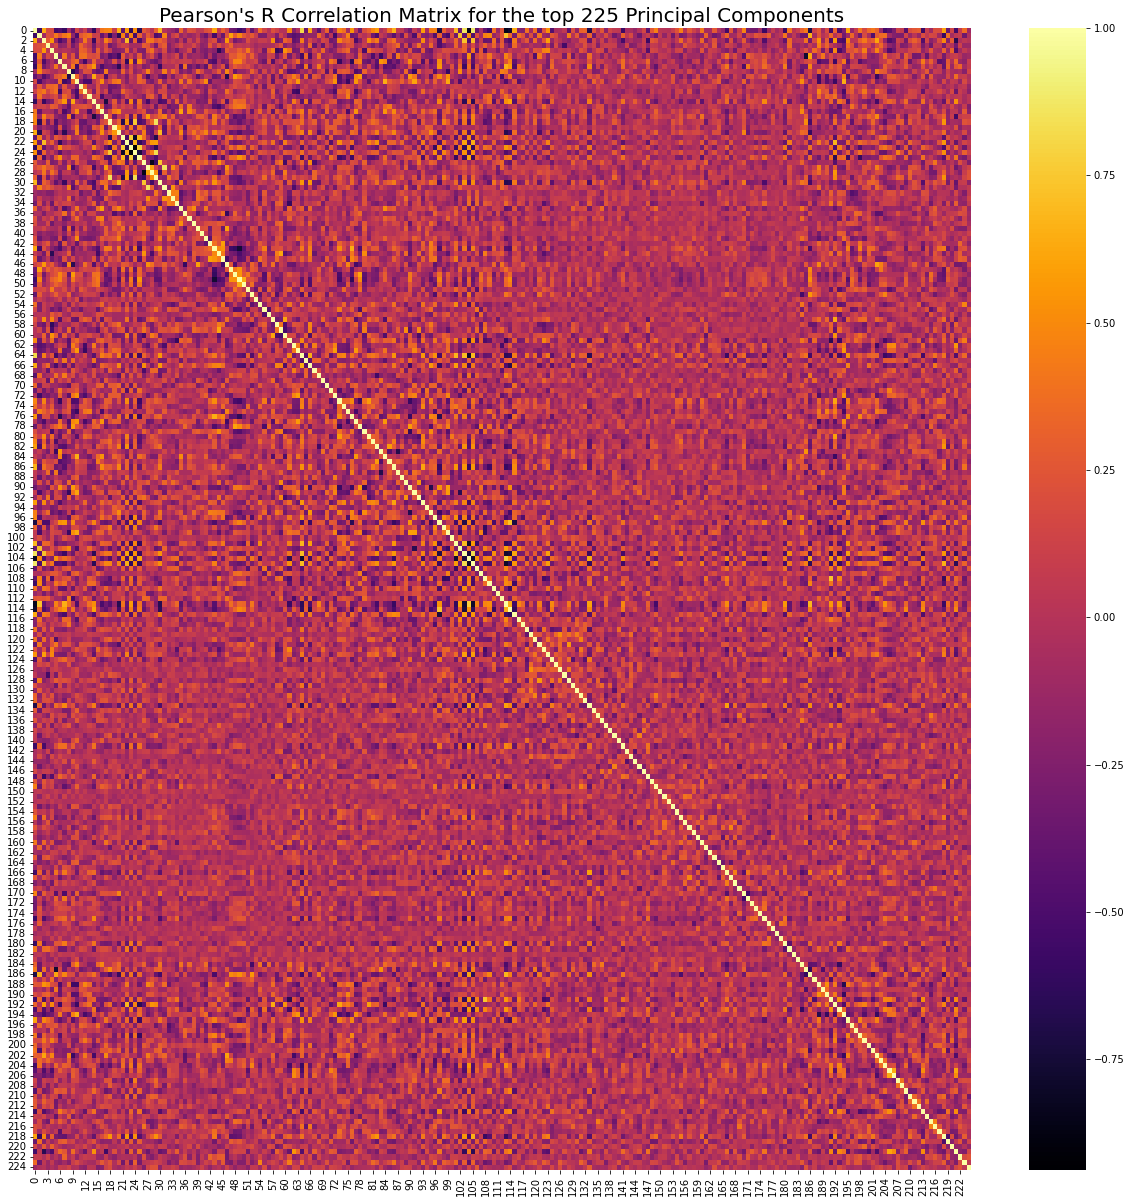

In [40]:
corr_mat = pd.DataFrame(Z).corr(method='pearson');
#mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(21,21));
plt.title("Pearson's R Correlation Matrix for the top 225 Principal Components", fontsize=20);
sns.heatmap(corr_mat, annot=False, lw=0, linecolor='white', cmap='inferno');
#print('Too many features to visualize at once!')

<Figure size 1800x1200 with 0 Axes>

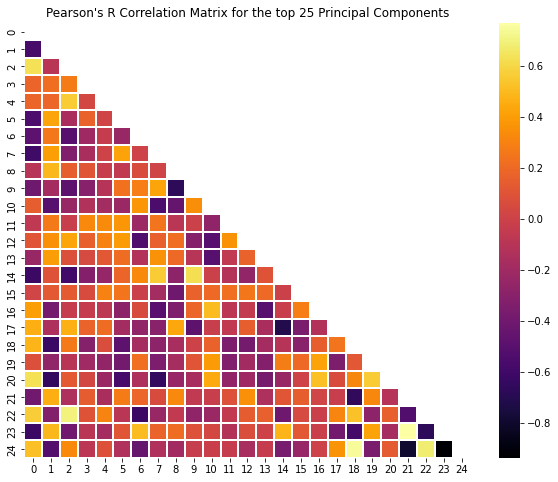

In [41]:
corr_mat = pd.DataFrame(Z[:,0:25]).corr(method='pearson');
mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(10,8));
plt.title("Pearson's R Correlation Matrix for the top 25 Principal Components", fontsize=12);
sns.heatmap(corr_mat, annot=False, lw=0.2, linecolor='white', cmap='inferno', mask=mask);
#print('Too many features to visualize at once!')

## Plotting the Principal Components

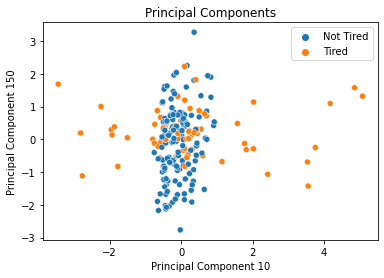

In [42]:
p1=10;
p2=150;
ax1 = sns.scatterplot(x=Z[:,p1], y=Z[:,p2], hue=y_labeled);
ax1.set(title='Principal Components',
        ylabel=f'Principal Component {p2}',
        xlabel=f'Principal Component {p1}');

## PC Distributions

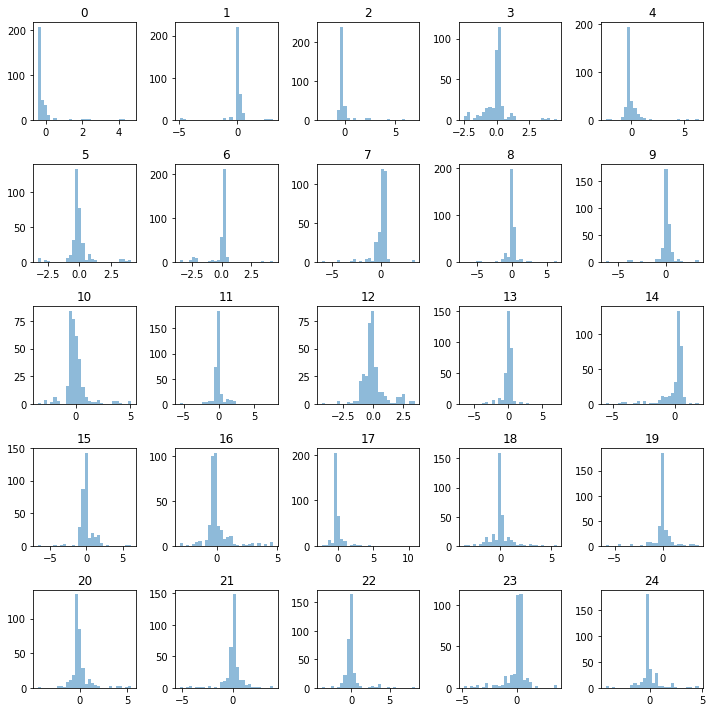

In [43]:
pc_title=[];
for i in range(1,25):
    pc_title.append(f'Principal Component {i}');

Z25 = Z[:,0:25]  

import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():      #Catch warnings in code section
    warnings.simplefilter("ignore")
    
    plt.subplots(figsize=(10,10));
    ax = plt.gca();
    pd.DataFrame(Z25).hist(bins=30, figsize=(1,1), grid=False, layout=(5,5), sharex=False, ax=ax, alpha=0.5);
    plt.tight_layout();

# ML Models

## Definitions

In [44]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

#Callbacks
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

## Basic ANN Model

In [45]:
models = []; #to hold: (str: name, model: model, data_to_take: z/img)

In [46]:
def build_basicANN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    #Initializing ANN
    m= tf.keras.models.Sequential()
    
    #Add input layer
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    
    #Add hidden layer
    m.add(tf.keras.layers.Dense(units=(neurons/2), activation='relu'))
    
    #Add output layer
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    #Compiling ANN
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #Return compiled, unfitted model
    return m;

In [47]:
%%time

#Build Model, Using defaults
## mANNBasic = build_basicANN() 
mANNBasic = (KerasClassifier(build_fn=build_basicANN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#Training ANN
hist_ANNBasic = mANNBasic.fit(Z_train, y_train, batch_size = 100, epochs = 100, verbose=0)

models.append(('ANN Basic', mANNBasic, 'z'))

Wall time: 1.02 s


In [48]:
print(f'Accuracy of the unoptimized Basic ANN model = {round(accuracy_score(y_true=y_test, y_pred=mANNBasic.predict(x=Z_test)) * 100,3)}%')

Accuracy of the unoptimized Basic ANN model = 100.0%


## Basic CNN Model

In [49]:
# Random-ish architecture

def build_basicCNN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    m = tf.keras.models.Sequential()
    m.add(tf.keras.layers.Conv2D(filters=neurons, kernel_size=3, activation='relu', input_shape=[15, 15, 1]))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Conv2D(filters=neurons/2, kernel_size=3, activation='relu'))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Flatten())
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return m;


In [50]:
%%time

#Build model using defaults
#mCNNBasic = build_basicCNN()
mCNNBasic = (KerasClassifier(build_fn=build_basicCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

### ORIGINAL
hist_CNNBasic = mCNNBasic.fit(x=x_train_img,
                              y=y_train, 
                              batch_size = 50,
                              epochs = 100, 
                              verbose=0,
                              callbacks=es,
                              validation_data=(x_test_img, y_test))


models.append(('CNN Basic', mCNNBasic, 'img'))

Restoring model weights from the end of the best epoch.
Epoch 00056: early stopping
Wall time: 8.6 s


In [51]:
print(f'Accuracy of the unoptimized Basic CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNBasic.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Basic CNN model = 97.059%


In [52]:
%%time
#### DATAGEN -- DOES NOT USE KERASCLASSIFIER DUE TO ERROR
mCNNBasic2 = build_basicCNN()
hist_CNNBasic2 = mCNNBasic2.fit(
                               x=imgs_train,
                               #y=y_train, 
                               batch_size = 50,
                               epochs = 100, 
                               verbose=0,
                               callbacks=es,
                               validation_data=imgs_test
                               )

Restoring model weights from the end of the best epoch.
Epoch 00044: early stopping
Wall time: 13.3 s


## Advanced CNN Model

In [53]:
def build_advancedCNN(optimizer='adam', epochs=100, batch_size=50, neurons=256):
    #params
    initFilt = neurons;
    initUnits= neurons;
    
    #model
    m = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=initFilt, kernel_size=3, activation='relu', input_shape=[15,15,1]),
        tf.keras.layers.Conv2D(filters=initFilt/2, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=initUnits),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return m;

In [54]:
%%time

# build using defaults
#mCNNAdvanced = build_advancedCNN()
mCNNAdvanced = (KerasClassifier(build_fn=build_advancedCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#fit
hist_CNNAdvanced = mCNNAdvanced.fit(x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Advanced', mCNNAdvanced, 'img'))

Restoring model weights from the end of the best epoch.
Epoch 00017: early stopping
Wall time: 13.1 s


In [55]:
print(f'Accuracy of the unoptimized Advanced CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNAdvanced.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Advanced CNN model = 95.588%


In [56]:
%%time
#### DATAGEN -- DOES NOT USE KERASCLASSIFIER DUE TO ERROR
mCNNAdvanced2 = build_advancedCNN()
hist_CNNAdvanced2 = mCNNBasic2.fit(
                               x=imgs_train,
                               #y=y_train, 
                               batch_size = 50,
                               epochs = 100, 
                               verbose=0,
                               callbacks=es,
                               validation_data=imgs_test
                               )

Restoring model weights from the end of the best epoch.
Epoch 00018: early stopping
Wall time: 5.04 s


## Random Forest Model

In [57]:
%%time
from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=100); #N_estimators and criterion can be optimized.
RFCmodel.fit(Z_train, y_train);
models.append(('RF', RFCmodel, 'z'));

Wall time: 241 ms


## Logistic Regression Model

In [58]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(solver='newton-cg');
LRmodel.fit(Z_train, y_train);
models.append(('LR',LRmodel, 'z'));

# Performance Comparison
## Via K-Fold Cross-Validation
### For SKLearn Models

In [59]:
%%time
#Suppress warnings for non-convergent ANN models
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Number of splits to make.
N = 3;


CV_results = [];
scoring = 'accuracy';

trun=0;
for tp in models:
    
    #Check whether model uses Z dataset or images for training
    mode = tp[2];
    
    if (mode == 'z'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], Z, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));
        
    if (mode == 'img'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], all_images, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));    
    
    print(f'run#{trun} for model \"{tp[0]}\" returned {CVinternal_results}')
    trun+=1;


run#0 for model "ANN Basic" returned [1. 1. 1.]
run#1 for model "CNN Basic" returned [1.         0.98230088 1.        ]
run#2 for model "CNN Advanced" returned [0.99115044 0.98230088 0.98214286]
run#3 for model "RF" returned [1. 1. 1.]
run#4 for model "LR" returned [1. 1. 1.]
Wall time: 3min 45s


### For Keras Models

In [79]:
names = [];
for tp in models:
    names.append(tp[0]);
    
CVdf = pd.DataFrame(CV_results).T;
CVdf.columns = names;
CVdf.T

,0,1,2
ANN Basic,1.00000,1.000000,1.000000
CNN Basic,1.00000,0.982301,1.000000
CNN Advanced,0.99115,0.982301,0.982143
RF,1.00000,1.000000,1.000000
LR,1.00000,1.000000,1.000000


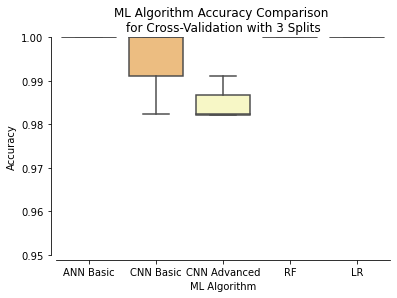

In [82]:
ax2 = sns.boxplot(data=CVdf, palette='Spectral')
ax2.set(xlabel = "ML Algorithm",
       ylabel = 'Accuracy',
       title = f"ML Algorithm Accuracy Comparison \nfor Cross-Validation with {N} Splits");
sns.despine(ax=ax2,offset=5, trim=False)
ax2.plot();
plt.ylim(0.95,1);